# Direct Color Mask and Yellow Line Detection

This document contains Li's direct mask code and my code for Day 1 with some modifications. 

In [1]:
# Import libraries 
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import os

This color_mask class shown in the next cell is based on Li's code. Here, we pre-select a range of yellow color in the HSV space as the filter. For parking lot images Lot 1 - lot 7, we used lower_yellow = (22,60,140) and upper_yellow = (60,255,255). 
For Lot 8 - Lot 11, we used lower_yellow = (20,100,100) and upper_yellow = (30,255,255). So, we see that this method 
is not idea since different images need different yellow color range as a filter. Better method should be considered.

In [2]:
# Class use to mask the image with yellow remaining

class color_mask:

    def __init__(self, filename):
        self.img = cv2.imread(filename)
        self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        
    def output_mask(self):
        # define range of yellow color in HSV
        #lower_yellow = np.array([20,100,100])# used for 8-11
        #upper_yellow = np.array([30,255,255])
        lower_yellow = np.array([22,60,140])
        upper_yellow = np.array([60,255,255])
        

        # Threshold the HSV image to get only yellow colors
        mask = cv2.inRange(self.img, lower_yellow, upper_yellow)

        # Bitwise-AND mask and original image
        output = cv2.bitwise_and(self.img, self.img, mask = mask)
        outputname = "Mask/"+filename.split('/')[-1].split('.')[0]+"mask.jpg"
        os.makedirs(os.path.dirname(outputname), exist_ok=True)
        cv2.imwrite(outputname, output)

        # Threshold the HSV image to get only yellow colors
        mask = cv2.inRange(self.img, lower_yellow, upper_yellow)

        # Bitwise-AND mask and original image
        output = cv2.bitwise_and(self.img, self.img, mask = mask)
        outputname = "Mask/"+filename.split('/')[-1].split('.')[0]+"mask.jpg"
        os.makedirs(os.path.dirname(outputname), exist_ok=True)
        cv2.imwrite(outputname, output)

In [3]:
# load the image, resize it and save it
filename = "Parking Lot/Lot1.tif"
outputname = "Resized/"+filename.split('/')[-1].split('.')[0]+"small.jpg"
os.makedirs(os.path.dirname(outputname), exist_ok=True)
img = cv2.imread(filename, 1)
img_resized = cv2.resize(img, (512,512))
cv2.imwrite(outputname, img_resized)
RGBimg = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

Our image has the shape: (512, 512, 3)


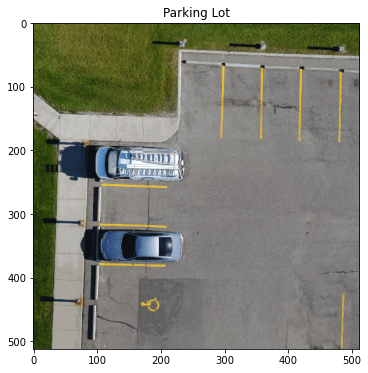

In [4]:
# display the resized image
plt.figure(figsize=(6,6))
plt.imshow(RGBimg)
plt.title('Parking Lot');
print("Our image has the shape: {}".format(RGBimg.shape))
plt.show()

In [5]:
# put the color mask on 
cmk = color_mask(outputname)
cmk.output_mask()

Our masked image has the shape: (512, 512, 3)


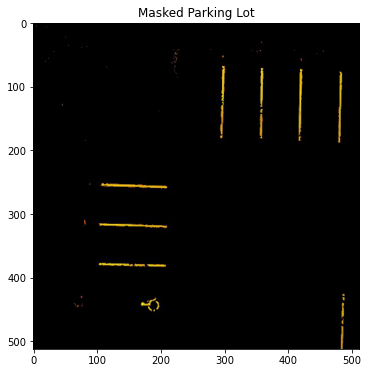

In [6]:
# save the masked image and display
maskedfile = "Mask/"+filename.split('/')[-1].split('.')[0]+"mask.jpg"

masked_img = cv2.imread(maskedfile, 1)
masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.title('Masked Parking Lot');
print("Our masked image has the shape: {}".format(masked_img.shape))
plt.imshow(masked_img)
plt.show()

## Apply Gaussian Filter 

In [7]:
gblur = cv2.GaussianBlur(masked_img, (5,5),0)

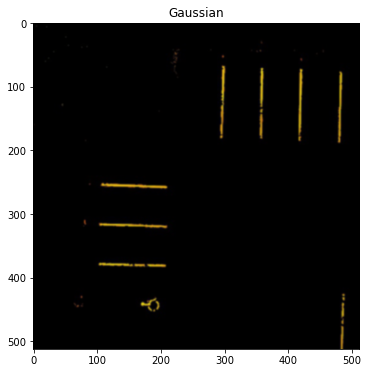

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(gblur)
plt.title('Gaussian');
plt.show()

## Canny Edge Detection

In [9]:
# two parameters need to play with
minval = 150
maxval = 250
canny_bF = cv2.Canny(gblur, minval, maxval)

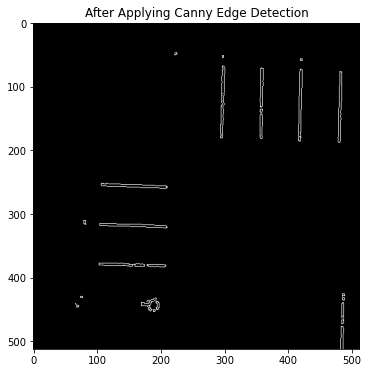

True

In [10]:
plt.figure(figsize=(6,6))
plt.imshow(canny_bF, cmap = 'gray')
plt.title('After Applying Canny Edge Detection');
plt.show()
edgefile = filename.split('/')[-1].split('.')[0]+"edge.jpg"
cv2.imwrite(edgefile, canny_bF)

## Hough Transform Line Detection

In [11]:
# three parameters need to play with
lines = cv2.HoughLinesP(canny_bF, 1, np.pi/180, threshold = 10, minLineLength = 10, maxLineGap = 10)
img_resized = cv2.imread(outputname, 1)

In [12]:
# draw the detected lines
for line in lines:
    x1, y1, x2, y2 = line[0]   
    cv2.line(img_resized, (x1,y1), (x2, y2), ( 0, 0, 255), 2)

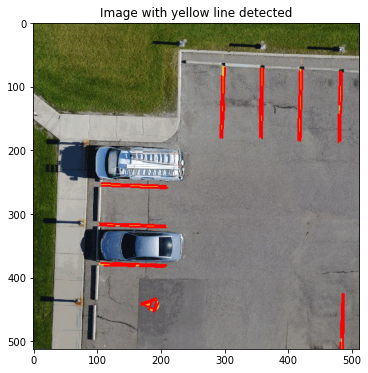

In [13]:
# save the image with line detected and display it
finaloutname = "Detected/"+filename.split('/')[-1].split('.')[0]+".jpg"
os.makedirs(os.path.dirname(finaloutname), exist_ok=True)
cv2.imwrite(finaloutname, img_resized)

img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_resized)
plt.title('Image with yellow line detected');
plt.show()

The wheelchair also get detected, should fix it.